# Education in Iraq - MICS data

Latest update: April 2024, JW

Data available from: https://mics.unicef.org/surveys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

## Dataframes: merge and overview

In [2]:
mics_hh = pd.read_spss('data/hh.sav').rename(str.lower, axis='columns')
mics_hl = pd.read_spss('data/hl.sav').rename(str.lower, axis='columns')
mics_wm = pd.read_spss('data/wm.sav').rename(str.lower, axis='columns')

In [3]:
mics_hh.head()

,hh1,hh2,hh3,hh4,hh5d,hh5m,hh5y,hh6,hh7,hh8,...,windex5,windex10,wscoreu,windex5u,windex10u,wscorer,windex5r,windex10r,psu,strata
0,1.0,1.0,412.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
1,1.0,2.0,413.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,DUHOK
2,1.0,3.0,415.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.047133,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
3,1.0,4.0,412.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,DUHOK
4,1.0,5.0,413.0,411.0,10.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.239107,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK


In [4]:
mics_hl.head()

,hh1,hh2,hint,hl1,hl3,hl4,hl5m,hl5y,hl6,hl8,...,windex5,windex10,wscoreu,windex5u,windex10u,wscorer,windex5r,windex10r,psu,strata
0,1.0,1.0,412.0,1.0,HEAD,MALE,JULY,1955.0,62.0,0.0,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
1,1.0,1.0,412.0,2.0,SPOUSE,FEMALE,JULY,1959.0,58.0,0.0,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
2,1.0,1.0,412.0,3.0,SON / DAUGHTER,FEMALE,MARCH,1994.0,24.0,3.0,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
3,1.0,1.0,412.0,4.0,SERVANT (LIVE-IN),FEMALE,DECEMBER,1989.0,28.0,4.0,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
4,1.0,3.0,415.0,1.0,HEAD,MALE,FEBRUARY,1974.0,44.0,0.0,...,Richest,10th decile,2.047133,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK


#### Merge data

In [5]:
mics = pd.merge(mics_hh, mics_hl, on=['hh1', 'hh2'])

In [6]:
mics['hh46'].value_counts()

hh46
COMPLETED                                                                          131394
DWELLING DESTROYED                                                                      0
DWELLING VACANT OR ADDRESS NOT A DWELLING                                               0
ENTIRE HOUSEHOLD ABSENT FOR EXTENDED PERIOD OF TIME                                     0
NO HOUSEHOLD MEMBER AT HOME OR NO COMPETENT RESPONDENT AT HOME AT TIME OF VISIT         0
OTHER                                                                                   0
REFUSED                                                                                 0
Name: count, dtype: int64

In [7]:
# keep individuals with completed interview
mics = mics.drop(mics[mics['hh46'] != 'COMPLETED'].index)

In [8]:
mics.head()

,hh1,hh2,hh3,hh4,hh5d_x,hh5m_x,hh5y_x,hh6_x,hh7_x,hh8,...,windex5_y,windex10_y,wscoreu_y,windex5u_y,windex10u_y,wscorer_y,windex5r_y,windex10r_y,psu_y,strata_y
0,1.0,1.0,412.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
1,1.0,1.0,412.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
2,1.0,1.0,412.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
3,1.0,1.0,412.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.157578,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK
4,1.0,3.0,415.0,411.0,8.0,4.0,2018.0,URBAN,DUHOK,NO,...,Richest,10th decile,2.047133,Richest,10th decile,NaN,NaN,NaN,1.0,DUHOK


In [9]:
mics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131394 entries, 0 to 131393
Columns: 295 entries, hh1 to strata_y
dtypes: category(230), float64(65)
memory usage: 94.1 MB


## Data preparation

### Sociodemographic information

In [10]:
# birth year
mics['byear'] = pd.to_numeric(mics['hl5y'], errors='coerce') 
mics['byear'].value_counts(normalize=True)

byear
2011.0    0.029868
2010.0    0.029533
2009.0    0.028916
2012.0    0.028886
2013.0    0.027889
            ...   
1915.0    0.000015
1924.0    0.000015
1912.0    0.000015
1907.0    0.000015
1903.0    0.000008
Name: proportion, Length: 106, dtype: float64

In [11]:
# age
mics.rename(columns={'hl6': 'age'}, inplace=True)

In [12]:
# gender
mics['gender'] = mics['hl4'].str.lower()
mics['gender'].value_counts()

gender
male      66538
female    64856
Name: count, dtype: int64

In [13]:
# region
mics['region'] = mics['hh7_x'].str.title()
mics.loc[mics['region']=='Karbalah', 'region'] = 'Karbala'
mics['region'].value_counts()

region
Baghdad        14316
Muthana         8095
Thiqar          7745
Anbar           7612
Basrah          7579
Qadisyah        7560
Misan           7529
Nainawa         7134
Najaf           7035
Salahaddin      7035
Wasit           6970
Diala           6878
Duhok           6827
Babil           6785
Karbala         6696
Kirkuk          5803
Erbil           4971
Sulaimaniya     4824
Name: count, dtype: int64

In [14]:
# area (urban/rural)
mics['area'] = mics['hh6_x'].str.lower()
mics['area'].value_counts()

area
urban    85838
rural    45556
Name: count, dtype: int64

### Highest education attended

#### Individual-level education

In [15]:
# ever attended school
mics['ed4'].replace(['DK', 'NO RESPONSE'], np.NaN, inplace=True)
mics['ed4'].value_counts()

ed4
YES    96002
NO     25731
Name: count, dtype: int64

In [16]:
# highest education attended (individual)
mics['ed5a'].replace(['DK', 'NO RESPONSE'], np.NaN, inplace=True)
mics['ed5a'].value_counts(normalize=True)

ed5a
PRIMARY                                 0.516591
INTERMEDIATE/LOWER SECONDARY            0.228291
SECONDARY/ UPPER SECONDARY              0.107296
BACHELORS DEGREE                        0.087408
DIPLOMA                                 0.035671
DIPLOMA (5 YEARS AFTER INTERMEDIATE)    0.010689
ECE                                     0.009189
HIGHER EDUCATION                        0.004865
Name: proportion, dtype: float64

In [17]:
# join information from columns ed4 and ed5a

mics.loc[mics['ed4']=='NO', 'edulevel'] = 0
mics.loc[mics['ed5a']=='ECE', 'edulevel'] = 0
mics.loc[mics['ed5a']=='PRIMARY', 'edulevel'] = 1
mics.loc[mics['ed5a']=='INTERMEDIATE/LOWER SECONDARY', 'edulevel'] = 2
mics.loc[mics['ed5a']=='SECONDARY/ UPPER SECONDARY', 'edulevel'] = 3
mics.loc[mics['ed5a']=='BACHELORS DEGREE', 'edulevel'] = 4
mics.loc[mics['ed5a']=='DIPLOMA', 'edulevel'] = 4
mics.loc[mics['ed5a']=='DIPLOMA (5 YEARS AFTER INTERMEDIATE)', 'edulevel'] = 4
mics.loc[mics['ed5a']=='HIGHER EDUCATION', 'edulevel'] = 4

mics['edulevel'].value_counts(normalize=True)

edulevel
1.0    0.407384
0.0    0.218645
2.0    0.180031
4.0    0.109326
3.0    0.084614
Name: proportion, dtype: float64

#### Parental education

In [18]:
mics['parent_edu'] = mics['edulevel'][(mics['hl3']=='HEAD') | (mics['hl3']=='SPOUSE')]

In [19]:
mics['parent_edu'] = mics.groupby(['hh1', 'hh2'])['parent_edu'].transform('max')

In [20]:
mics[['hh1', 'hh2', 'hl3', 'ed4', 'ed5a', 'parent_edu']].head()

,hh1,hh2,hl3,ed4,ed5a,parent_edu
0,1.0,1.0,HEAD,YES,INTERMEDIATE/LOWER SECONDARY,3.0
1,1.0,1.0,SPOUSE,YES,SECONDARY/ UPPER SECONDARY,3.0
2,1.0,1.0,SON / DAUGHTER,YES,BACHELORS DEGREE,3.0
3,1.0,1.0,SERVANT (LIVE-IN),NO,NaN,3.0
4,1.0,3.0,HEAD,YES,INTERMEDIATE/LOWER SECONDARY,3.0


In [21]:
mics['parent_edu'].value_counts(normalize=True)

parent_edu
1.0    0.308390
2.0    0.236779
4.0    0.208719
0.0    0.140146
3.0    0.105966
Name: proportion, dtype: float64

In [22]:
# map values to educational variables

edumap = {0:'no education', 1:'primary', 2:'lower secondary', 3:'upper secondary', 4:'higher'}

mics['edulevel'] = mics['edulevel'].map(edumap)
mics['parent_edu'] = mics['parent_edu'].map(edumap)

### Information on current educational situation

In [23]:
# currently enrolled?
mics['ed9'].value_counts()

ed9
YES            39422
NO             14870
NO RESPONSE        2
Name: count, dtype: int64

In [24]:
mics.loc[mics['ed4']=='NO', 'current'] = "not enrolled" #never enrolled
mics.loc[mics['ed9']=='NO', 'current'] = "not enrolled" #currently not enrolled
mics.loc[mics['ed9']=='YES', 'current'] = "enrolled" #currently enrolled

mics['current'].value_counts()

current
not enrolled    40601
enrolled        39422
Name: count, dtype: int64

In [25]:
# educational level currently attended
mics['ed10a'].replace(['DK', 'NO RESPONSE'], np.NaN, inplace=True)
mics['ed10a'].value_counts(normalize=True)

ed10a
PRIMARY                                 0.579945
INTERMEDIATE/LOWER SECONDARY            0.205195
SECONDARY/ UPPER SECONDARY              0.124680
BACHELORS DEGREE                        0.059435
ECE                                     0.020776
DIPLOMA                                 0.007509
DIPLOMA (5 YEARS AFTER INTERMEDIATE)    0.002055
HIGHER EDUCATION                        0.000406
Name: proportion, dtype: float64

In [26]:
# join information from columns ed9 and ed10a

mics.loc[mics['ed4']=='NO', 'edustatus'] = 'out of education'
mics.loc[mics['ed9']=='NO', 'edustatus'] = 'out of education'
mics.loc[mics['ed10a']=='ECE', 'edustatus'] = 'ECE'
mics.loc[mics['ed10a']=='PRIMARY', 'edustatus'] = 'primary education'
mics.loc[mics['ed10a']=='INTERMEDIATE/LOWER SECONDARY', 'edustatus'] = 'lower secondary education'
mics.loc[mics['ed10a']=='SECONDARY/ UPPER SECONDARY', 'edustatus'] = 'upper secondary education'
mics.loc[mics['ed10a']=='BACHELORS DEGREE', 'edustatus'] = 'higher education'
mics.loc[mics['ed10a']=='DIPLOMA', 'edustatus'] = 'higher education'
mics.loc[mics['ed10a']=='DIPLOMA (5 YEARS AFTER INTERMEDIATE)', 'edustatus'] = 'higher education'
mics.loc[mics['ed10a']=='HIGHER EDUCATION', 'edustatus'] = 'higher education'

mics['edustatus'].value_counts(normalize=True)

edustatus
out of education             0.507373
primary education            0.285696
lower secondary education    0.101085
upper secondary education    0.061421
higher education             0.034191
ECE                          0.010235
Name: proportion, dtype: float64

#### ECE participation of 4- and 5-year-olds

In [27]:
mics.loc[mics['ed4']=='NO', 'ece_participation'] = 0
mics.loc[mics['ed9']=='NO', 'ece_participation'] = 0
mics.loc[(mics['ed9']=='YES') & (mics['ed10a']!='ECE'), 'ece_participation'] = 0
mics.loc[mics['ed10a']=='ECE', 'ece_participation'] = 1
mics.loc[(mics['age']!=4) & (mics['age']!=5), 'ece_participation'] = np.nan

mics['ece_participation'].value_counts(normalize=True)

ece_participation
0.0    0.914006
1.0    0.085994
Name: proportion, dtype: float64

#### Primary school attendance of 7- and 8-year-olds

In [28]:
mics.loc[mics['ed4']=='NO', 'primary_participation'] = 0
mics.loc[mics['ed9']=='NO', 'primary_participation'] = 0
mics.loc[(mics['ed9']=='YES') & (mics['ed10a']!='PRIMARY'), 'primary_participation'] = 0
mics.loc[mics['ed10a']=='PRIMARY', 'primary_participation'] = 1
mics.loc[(mics['age']!=7) & (mics['age']!=8), 'primary_participation'] = np.nan

mics['primary_participation'].value_counts(normalize=True)

primary_participation
1.0    0.923339
0.0    0.076661
Name: proportion, dtype: float64

#### Secondary school attendance of 14- to 16-year-olds

In [29]:
mics.loc[mics['ed4']=='NO', 'secondary_participation'] = 0
mics.loc[mics['ed9']=='NO', 'secondary_participation'] = 0
mics.loc[(mics['ed9']=='YES') & (mics['ed10a']!='PRIMARY') | (mics['ed10a']!='INTERMEDIATE/LOWER SECONDARY') | (mics['ed10a']!='SECONDARY/ UPPER SECONDARY'), 'secondary_participation'] = 0
mics.loc[(mics['ed10a']=='PRIMARY') | (mics['ed10a']=='INTERMEDIATE/LOWER SECONDARY') | (mics['ed10a']=='SECONDARY/ UPPER SECONDARY'), 'secondary_participation'] = 1
mics.loc[(mics['age']!=14) & (mics['age']!=15) & (mics['age']!=16), 'secondary_participation'] = np.nan

mics['secondary_participation'].value_counts()

secondary_participation
1.0    5945
0.0    2846
Name: count, dtype: int64

#### Grade level of 14- to 16-year-olds

In [30]:
mics["ed5a"].value_counts()

ed5a
PRIMARY                                 49586
INTERMEDIATE/LOWER SECONDARY            21913
SECONDARY/ UPPER SECONDARY              10299
BACHELORS DEGREE                         8390
DIPLOMA                                  3424
DIPLOMA (5 YEARS AFTER INTERMEDIATE)     1026
ECE                                       882
HIGHER EDUCATION                          467
Name: count, dtype: int64

In [31]:
mics['grade_level'] = pd.to_numeric(mics['ed5b'])
mics.loc[mics['ed4']=='NO', 'grade_level'] = 0
mics.loc[mics['ed5a']=='ECE', 'grade_level'] = 0
mics.loc[mics['ed5a']=='PRIMARY', 'grade_level'] += 0
mics.loc[mics['ed5a']=='INTERMEDIATE/LOWER SECONDARY', 'grade_level'] += 6
mics.loc[mics['ed5a']=='SECONDARY/ UPPER SECONDARY', 'grade_level'] += 6
mics.loc[mics['ed5a']=='DIPLOMA (5 YEARS AFTER INTERMEDIATE)', 'grade_level'] += 9
mics.loc[mics['ed5a']=='DIPLOMA', 'grade_level'] = 12
mics.loc[mics['ed5a']=='BACHELORS DEGREE', 'grade_level'] = 12
mics.loc[mics['ed5a']=='HIGHER EDUCATION', 'grade_level'] = 12

mics.loc[mics['grade_level']>11, 'grade_level'] = 11

gradelevel = {0:'never attended',1:'grade 1',2:'grade 2',3:'grade 3',4:'grade 4',5:'grade 5',6:'grade 6',7:'grade 7',
              8:'grade 8',9:'grade 9',10:'grade 10',11:'grade 11 or higher'}

mics['grade_level'] = mics['grade_level'].map(gradelevel)

mics["grade_level"].value_counts()

grade_level
never attended        26613
grade 11 or higher    21568
grade 6               14582
grade 5               10294
grade 9                9884
grade 4                7314
grade 3                6363
grade 7                6111
grade 8                5918
grade 2                5727
grade 1                5306
grade 10               2038
Name: count, dtype: int64

### Design Weights

In [32]:
mics['hhweight_x'].describe()

count    131394.000000
mean          0.976327
std           1.474489
min           0.100084
25%           0.457292
50%           0.664970
75%           1.055670
max          37.141684
Name: hhweight_x, dtype: float64

## Data visualization

In [33]:
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Calibri"

### 1. Educational situation of 4- to 18-year-olds

In [34]:
# dataframe for age group 4-18

edu418 = mics.loc[mics['age'].isin([*range(4, 19)]), ['edustatus', 'age', 'hhweight_x']].copy()

edu418.head()

,edustatus,age,hhweight_x
8,out of education,15.0,0.264968
9,out of education,7.0,0.264968
16,upper secondary education,16.0,0.264968
19,primary education,9.0,0.264968
20,primary education,6.0,0.264968


In [35]:
# relative frequencies of educational situation by age

edu418['age'] = edu418['age'].astype('string').apply(lambda x: x.split('.')[0])

pct_edustatus = pd.crosstab(index=edu418['age'], columns=edu418['edustatus'], 
                            values=edu418['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_edustatus = pct_edustatus.reindex(['ECE','primary education','lower secondary education',
                                       'upper secondary education','higher education','out of education'], 
                                      axis='columns').reindex(['4','5','6','7','8','9','10','11','12','13','14','15',
                                                               '16','17','18'])

pct_edustatus

edustatus,ECE,primary education,lower secondary education,upper secondary education,higher education,out of education
age,,,,,,
4,4.802996,0.081583,0.000000,0.000000,0.000000,95.115421
5,12.539112,0.732625,0.000000,0.000000,0.000000,86.728263
6,2.791414,64.756362,0.011484,0.000000,0.000000,32.440740
7,0.170325,91.868420,0.108715,0.000000,0.000000,7.852540
8,0.173826,94.687045,0.072249,0.023256,0.000000,5.043623
9,0.131040,92.918972,0.087934,0.015204,0.000000,6.846850
10,0.035575,93.481405,0.144626,0.000000,0.000000,6.338394
11,0.100027,89.393416,0.753791,0.049279,0.025583,9.677904
12,0.082827,54.037229,33.308184,0.144833,0.000000,12.426928


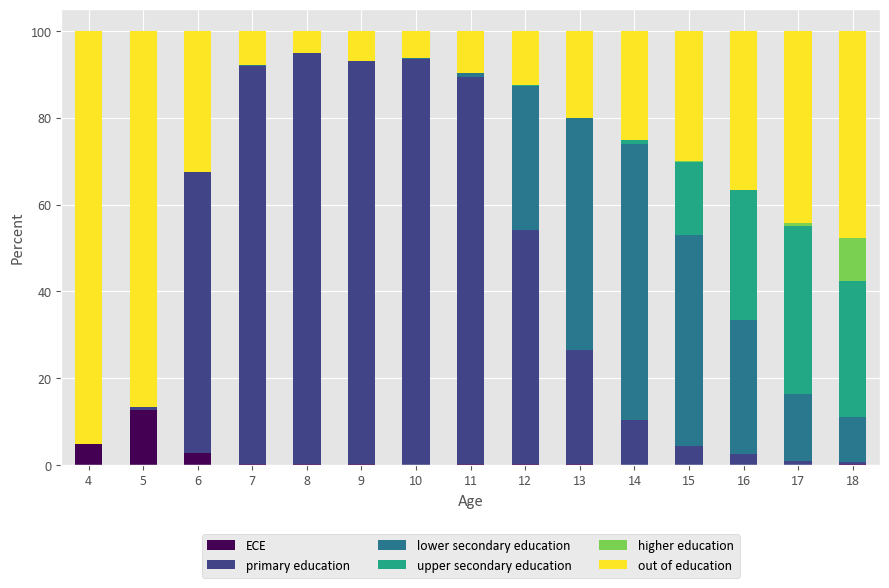

In [36]:
pct_edustatus.plot(kind='bar', stacked=True, colormap='viridis', figsize=(9,6))

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='center', ncol=6)
plt.xlabel('Age')
plt.ylabel('Percent')
#plt.title('Educational situation of 4- to 18-year-olds')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='center', ncol=3)
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('fig2_edu_status_u18.png')

### 2. ECE participation by subgroups

In [37]:
# dataframe for age group 4 & 5 years

eduECE = mics.loc[mics['age'].isin([*range(4, 6)]), 
                ['ece_participation', 'age', 'gender', 'area', 'parent_edu', 'hhweight_x']].copy()

eduECE.head()

,ece_participation,age,gender,area,parent_edu,hhweight_x
48,0.0,5.0,male,urban,higher,0.264968
73,1.0,5.0,female,urban,higher,1.133474
78,1.0,4.0,male,urban,higher,1.133474
94,0.0,5.0,male,urban,higher,1.133474
98,0.0,5.0,female,urban,higher,1.133474


In [38]:
# relative frequencies of total ECE participation

eduECE['total']='total'

pct_ece_total = pd.crosstab(index=eduECE['total'], columns=eduECE['ece_participation'], 
                            values=eduECE['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_ece_total

ece_participation,0.0,1.0
total,,
total,91.094088,8.905912


In [39]:
# relative frequencies of ECE participation by gender

pct_ece_gender = pd.crosstab(index=eduECE['gender'], columns=eduECE['ece_participation'], 
                            values=eduECE['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_ece_gender

ece_participation,0.0,1.0
gender,,
female,90.786850,9.213150
male,91.374774,8.625226


In [40]:
# relative frequencies of ECE participation by age

pct_ece_age = pd.crosstab(index=eduECE['age'], columns=eduECE['ece_participation'], 
                            values=eduECE['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_ece_age = pct_ece_age[pct_ece_age.index.isin([*range(4, 6)])]

pct_ece_age.rename(index={4:'4 yrs', 5:'5 yrs'}, inplace=True)

pct_ece_age

ece_participation,0.0,1.0
age,,
4 yrs,95.197004,4.802996
5 yrs,87.460888,12.539112


In [41]:
# relative frequencies of ECE participation by parental education

pct_ece_hedulevel = pd.crosstab(index=eduECE['parent_edu'], columns=eduECE['ece_participation'], 
                            values=eduECE['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_ece_hedulevel = pct_ece_hedulevel.reindex(['no education','primary','lower secondary','upper secondary','higher'])

pct_ece_hedulevel

ece_participation,0.0,1.0
parent_edu,,
no education,96.019183,3.980817
primary,95.495830,4.504170
lower secondary,92.080613,7.919387
upper secondary,88.092180,11.907820
higher,80.725732,19.274268


In [42]:
# relative frequencies of ECE participation by area

pct_ece_area = pd.crosstab(index=eduECE['area'], columns=eduECE['ece_participation'], 
                            values=eduECE['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_ece_area

ece_participation,0.0,1.0
area,,
rural,97.899011,2.100989
urban,87.782199,12.217801


In [43]:
# concatenate aggregate tables

pct_ece = pd.concat([pct_ece_total, pct_ece_gender, pct_ece_age, pct_ece_hedulevel, pct_ece_area])

pct_ece

ece_participation,0.0,1.0
total,91.094088,8.905912
female,90.786850,9.213150
male,91.374774,8.625226
4 yrs,95.197004,4.802996
5 yrs,87.460888,12.539112
no education,96.019183,3.980817
primary,95.495830,4.504170
lower secondary,92.080613,7.919387
upper secondary,88.092180,11.907820
higher,80.725732,19.274268


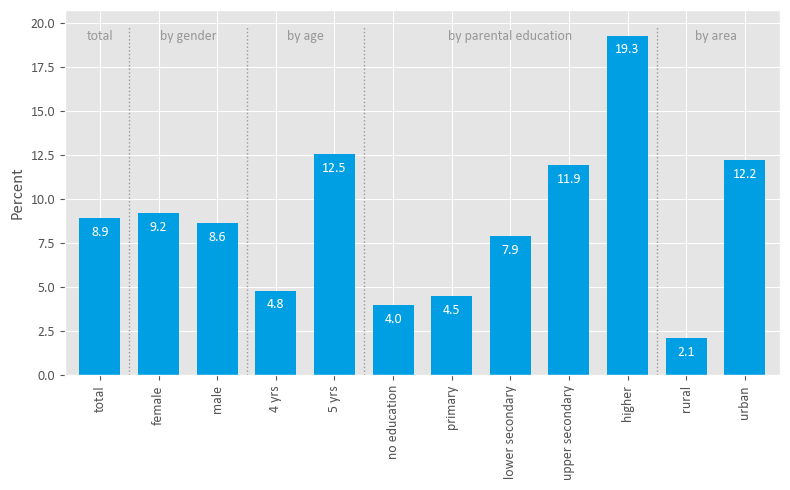

In [46]:
# figure for column 1 (=yes)

fig = pct_ece[1].plot.bar(figsize=(8,5), width=.7, color='#009fe3')

for c in fig.containers:
    fig.bar_label(c, color='white', padding=-15, fmt='%.1f')

#fig.set_title('ECE participation rates of 4- and 5-year-olds')
fig.set_ylabel('Percent')

ymin,ymax = fig.get_ylim()
fig.vlines(x=[0.5, 2.5, 4.5, 9.5], lw=1, linestyles='dotted', ymin=ymin, ymax=ymax-0.5, color='0.6')
fig.text(0, ymax-1, 'total', horizontalalignment='center', verticalalignment='center', color='0.6')
fig.text(1.5, ymax-1, 'by gender', horizontalalignment='center', verticalalignment='center', color='0.6')
fig.text(3.5, ymax-1, 'by age', horizontalalignment='center', verticalalignment='center', color='0.6')
fig.text(7, ymax-1, 'by parental education', horizontalalignment='center', verticalalignment='center', color='0.6')
fig.text(10.5, ymax-1, 'by area', horizontalalignment='center', verticalalignment='center', color='0.6')

plt.tight_layout()
plt.savefig('fig3_participation_ece.png')

### 3. Primary school attendance by subgroups

In [54]:
# dataframe for 7- and 8-year-olds

eduPrim = mics.loc[mics['age'].isin([*range(7, 9)]), 
                 ['primary_participation', 'age', 'gender', 'area', 'parent_edu', 'hhweight_x']].copy()

eduPrim.head()

,primary_participation,age,gender,area,parent_edu,hhweight_x
9,0.0,7.0,female,urban,upper secondary,0.264968
37,1.0,7.0,male,urban,higher,0.264968
47,1.0,8.0,male,urban,higher,0.264968
72,1.0,8.0,male,urban,higher,1.133474
93,1.0,7.0,female,urban,higher,1.133474


In [55]:
# relative frequencies of total primary school attendance

eduPrim['total']='total'

pct_prim_total = pd.crosstab(index=eduPrim['total'], columns=eduPrim['primary_participation'], 
                            values=eduPrim['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_prim_total

primary_participation,0.0,1.0
total,,
total,6.788658,93.211342


In [56]:
# relative frequencies of primary school attendance by gender

pct_prim_gender = pd.crosstab(index=eduPrim['gender'], columns=eduPrim['primary_participation'], 
                            values=eduPrim['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_prim_gender

primary_participation,0.0,1.0
gender,,
female,7.457778,92.542222
male,6.198153,93.801847


In [57]:
# relative frequencies of primary school attendance by age

pct_prim_age = pd.crosstab(index=eduPrim['age'], columns=eduPrim['primary_participation'], 
                            values=eduPrim['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_prim_age = pct_prim_age[pct_prim_age.index.isin([*range(7, 9)])]

pct_prim_age.rename(index={7:'7 yrs', 8:'8 yrs'}, inplace=True)

pct_prim_age

primary_participation,0.0,1.0
age,,
7 yrs,8.131580,91.868420
8 yrs,5.312955,94.687045


In [58]:
# relative frequencies of primary school attendance by parental education

pct_prim_hedulevel = pd.crosstab(index=eduPrim['parent_edu'], columns=eduPrim['primary_participation'], 
                            values=eduPrim['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_prim_hedulevel = pct_prim_hedulevel.reindex(['no education','primary','lower secondary','upper secondary','higher'])

pct_prim_hedulevel

primary_participation,0.0,1.0
parent_edu,,
no education,17.148625,82.851375
primary,8.569815,91.430185
lower secondary,4.206835,95.793165
upper secondary,4.100360,95.899640
higher,2.694905,97.305095


In [59]:
# relative frequencies of primary school attendance by area

pct_prim_area = pd.crosstab(index=eduPrim['area'], columns=eduPrim['primary_participation'], 
                            values=eduPrim['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_prim_area

primary_participation,0.0,1.0
area,,
rural,9.521946,90.478054
urban,5.433327,94.566673


In [60]:
# concatenate aggregate tables

pct_prim = pd.concat([pct_prim_total, pct_prim_gender, pct_prim_age, pct_prim_hedulevel, pct_prim_area])

pct_prim

primary_participation,0.0,1.0
total,6.788658,93.211342
female,7.457778,92.542222
male,6.198153,93.801847
7 yrs,8.131580,91.868420
8 yrs,5.312955,94.687045
no education,17.148625,82.851375
primary,8.569815,91.430185
lower secondary,4.206835,95.793165
upper secondary,4.100360,95.899640
higher,2.694905,97.305095


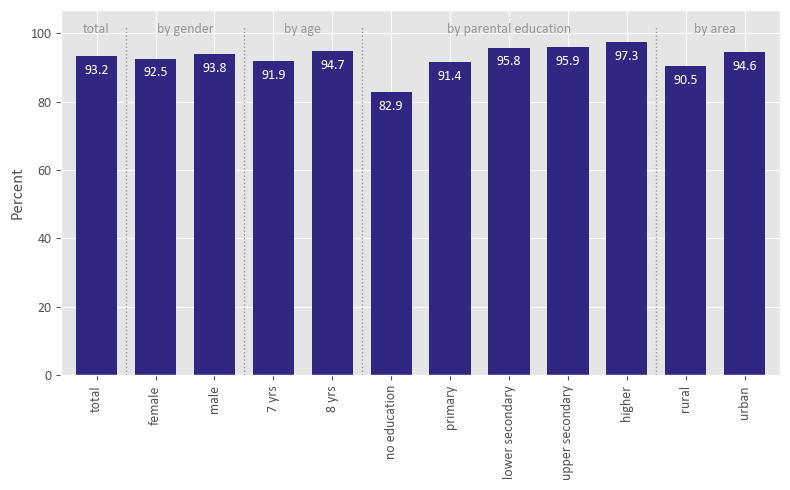

In [61]:
# figure for column 1 (=yes)

fig = pct_prim[1].plot.bar(figsize=(8,5), width=.7, color='#312783')

for c in fig.containers:
    fig.bar_label(c, color='white', padding=-15, fmt='%.1f')
    
#fig.set_title('Primary school attendance rates of 7- and 8-year-olds')
fig.set_ylabel('Percent')

ymin,ymax = fig.get_ylim()
fig.vlines(x=[0.5, 2.5, 4.5, 9.5], lw=1, linestyles='dotted', ymin=ymin, ymax=ymax-0.5, color='0.6')

fig.text(0, ymax-1, 'total', horizontalalignment='center', verticalalignment='center', color='0.6')
fig.text(1.5, ymax-1, 'by gender', horizontalalignment='center', verticalalignment='center', color='0.6')
fig.text(3.5, ymax-1, 'by age', horizontalalignment='center', verticalalignment='center', color='0.6')
fig.text(7, ymax-1, 'by parental education', horizontalalignment='center', verticalalignment='center', color='0.6')
fig.text(10.5, ymax-1, 'by area', horizontalalignment='center', verticalalignment='center', color='0.6')

plt.tight_layout()
plt.savefig('fig5_participation_primary.png')

### 4.1 Secondary school attendance by subgroups

In [164]:
# dataframe for 14- to 16-year-olds

eduSec = mics.loc[mics['age'].isin([*range(14, 17)]), 
                ['secondary_participation', 'age', 'gender', 'area', 'parent_edu', 'grade_level', 'current',
                 'hhweight_x']].copy()

eduSec.head()

,secondary_participation,age,gender,area,parent_edu,grade_level,current,hhweight_x
8,0.0,15.0,male,urban,upper secondary,never attended,not enrolled,0.264968
16,1.0,16.0,male,urban,primary,grade 10,enrolled,0.264968
27,1.0,15.0,female,urban,higher,grade 11 or higher,enrolled,0.264968
41,1.0,16.0,female,urban,higher,grade 10,enrolled,0.264968
85,1.0,15.0,male,urban,higher,grade 10,enrolled,1.133474


In [63]:
# relative frequencies of total secondary school attendance

eduSec['total'] = 'total'

pct_sec_total = pd.crosstab(index=eduSec['total'], columns=eduSec['secondary_participation'], 
                            values=eduSec['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_total

secondary_participation,0.0,1.0
total,,
total,30.572345,69.427655


In [64]:
# relative frequencies of secondary school attendance by gender

pct_sec_gender = pd.crosstab(index=eduSec['gender'], columns=eduSec['secondary_participation'], 
                            values=eduSec['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_gender

secondary_participation,0.0,1.0
gender,,
female,36.299431,63.700569
male,25.213885,74.786115


In [65]:
# relative frequencies of secondary school attendance by age

pct_sec_age = pd.crosstab(index=eduSec['age'], columns=eduSec['secondary_participation'], 
                            values=eduSec['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_age = pct_sec_age[pct_sec_age.index.isin([*range(14, 17)])]

pct_sec_age.rename(index={14:'14 yrs', 15:'15 yrs', 16:'16 yrs'}, inplace=True)

pct_sec_age

secondary_participation,0.0,1.0
age,,
14 yrs,25.181394,74.818606
15 yrs,30.216981,69.783019
16 yrs,36.700169,63.299831


In [66]:
# relative frequencies of secondary school attendance by parental education

pct_sec_hedulevel = pd.crosstab(index=eduSec['parent_edu'], columns=eduSec['secondary_participation'], 
                            values=eduSec['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_hedulevel = pct_sec_hedulevel.reindex(['no education','primary','lower secondary','upper secondary','higher'])

pct_sec_hedulevel

secondary_participation,0.0,1.0
parent_edu,,
no education,46.953001,53.046999
primary,38.466150,61.533850
lower secondary,31.927601,68.072399
upper secondary,22.233076,77.766924
higher,12.446607,87.553393


In [67]:
# relative frequencies of secondary school attendance by area

pct_sec_area = pd.crosstab(index=eduSec['area'], columns=eduSec['secondary_participation'], 
                            values=eduSec['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_area

secondary_participation,0.0,1.0
area,,
rural,40.457451,59.542549
urban,25.805025,74.194975


In [68]:
# concatenate aggregate tables

pct_sec = pd.concat([pct_sec_total, pct_sec_gender, pct_sec_age, pct_sec_hedulevel, pct_sec_area])

pct_sec

secondary_participation,0.0,1.0
total,30.572345,69.427655
female,36.299431,63.700569
male,25.213885,74.786115
14 yrs,25.181394,74.818606
15 yrs,30.216981,69.783019
16 yrs,36.700169,63.299831
no education,46.953001,53.046999
primary,38.466150,61.533850
lower secondary,31.927601,68.072399
upper secondary,22.233076,77.766924


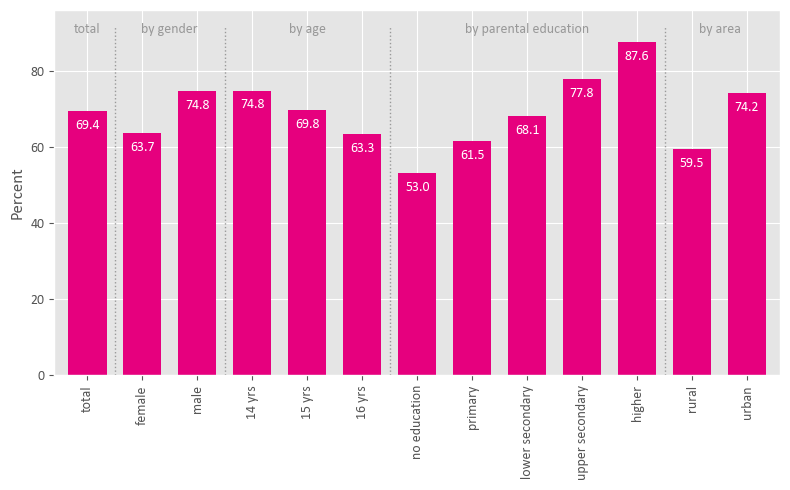

In [69]:
# figure for column 1 (=yes)

fig = pct_sec[1].plot.bar(figsize=(8,5), width=.7, color='#e6007e')

for c in fig.containers:
    fig.bar_label(c, color='white', padding=-15, fmt='%.1f')
    
#fig.set_title('Secondary school attendance rates of 14- to 16-year-olds')
fig.set_ylabel('Percent')

ymin,ymax = fig.get_ylim()
fig.vlines(x=[0.5, 2.5, 5.5, 10.5], lw=1, linestyles='dotted', ymin=ymin, ymax=ymax-0.5, color='0.6')

fig.text(0, ymax-1, 'total', horizontalalignment='center', verticalalignment='center', color='0.6')
fig.text(1.5, ymax-1, 'by gender', horizontalalignment='center', verticalalignment='center', color='0.6')
fig.text(4, ymax-1, 'by age', horizontalalignment='center', verticalalignment='center', color='0.6')
fig.text(8, ymax-1, 'by parental education', horizontalalignment='center', verticalalignment='center', color='0.6')
fig.text(11.5, ymax-1, 'by area', horizontalalignment='center', verticalalignment='center', color='0.6')

plt.tight_layout()
plt.savefig('fig7_participation_secondary.png')

### 4.2 Grade level of adolescents

In [165]:
eduSec["grade_level"].value_counts()

grade_level
grade 9               2010
grade 8               1480
grade 7               1101
grade 10               879
grade 6                868
grade 5                751
grade 11 or higher     520
never attended         398
grade 4                387
grade 3                217
grade 2                124
grade 1                 55
Name: count, dtype: int64

In [71]:
eduSec["current"].value_counts()

current
enrolled        5957
not enrolled    2832
Name: count, dtype: int64

In [166]:
pct_grade_level = pd.crosstab(index=eduSec['grade_level'], columns=eduSec['current'], 
                            values=eduSec['hhweight_x'], aggfunc=sum, normalize='columns')*100

pct_grade_level = pct_grade_level.reindex(['never attended','grade 1','grade 2','grade 3','grade 4','grade 5','grade 6',
                                           'grade 7','grade 8','grade 9','grade 10','grade 11 or higher'])

pct_grade_level

current,enrolled,not enrolled
grade_level,,
never attended,0.008040,12.694569
grade 1,0.012723,1.494209
grade 2,0.065786,3.956675
grade 3,0.085584,7.769362
grade 4,0.631369,11.178961
grade 5,2.210343,21.246718
grade 6,5.105284,18.842344
grade 7,12.728806,12.414500
grade 8,22.081206,6.329795


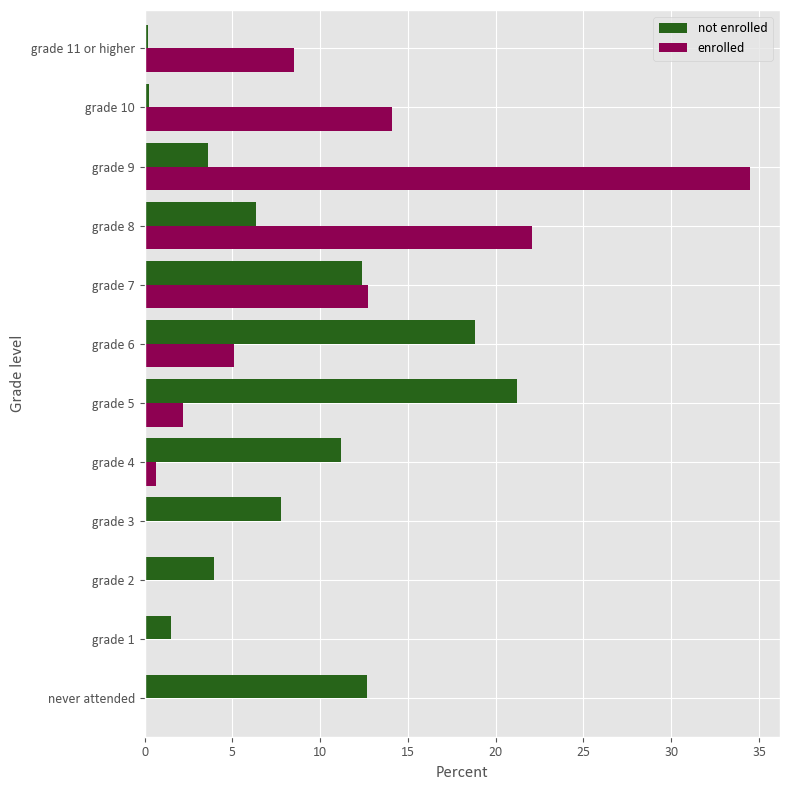

In [167]:
pct_grade_level.plot(kind='barh', colormap='PiYG', figsize=(8, 8), width=.8)

plt.legend(bbox_to_anchor=(1, 1), loc=1, reverse=True)
plt.ylabel('Grade level')
plt.xlabel('Percent')
#plt.title('Highest grade level attended by adolescents')

plt.tight_layout()
#plt.savefig('fig9_grade_level.png')

### 5. Highest education attended by adult population

In [47]:
# dataframe for individuals born between 1954 and 2003

eduAdult = mics.loc[mics['byear'].isin([*range(1954, 2004)]), ['edulevel', 'byear', 'gender', 'region', 'hhweight_x']].copy()

eduAdult.head()

,edulevel,byear,gender,region,hhweight_x
0,lower secondary,1955.0,male,Duhok,0.264968
1,upper secondary,1959.0,female,Duhok,0.264968
2,higher,1994.0,female,Duhok,0.264968
3,no education,1989.0,female,Duhok,0.264968
4,lower secondary,1974.0,male,Duhok,0.264968


#### Education of adults: total & by gender

In [48]:
# relative frequencies of education of total population

eduAdult['total'] = 'total'

pct_edu_total = pd.crosstab(index=eduAdult['total'], columns=eduAdult['edulevel'], 
                            values=eduAdult['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_edu_total

edulevel,higher,lower secondary,no education,primary,upper secondary
total,,,,,
total,17.498507,23.869913,12.379138,32.480196,13.772247


In [49]:
# Relative frequencies of education by gender

pct_edu_gender = pd.crosstab(index=eduAdult['gender'], columns=eduAdult['edulevel'], 
                            values=eduAdult['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_edu_gender

edulevel,higher,lower secondary,no education,primary,upper secondary
gender,,,,,
female,14.549496,19.524921,18.570007,35.156911,12.198664
male,20.397263,28.140859,6.293770,29.849095,15.319013


In [50]:
# join aggregate tables

pct_edu = pd.concat([pct_edu_total, pct_edu_gender]).reindex(['no education', 'primary', 'lower secondary', 
                                                      'upper secondary', 'higher'], axis='columns')

pct_edu

edulevel,no education,primary,lower secondary,upper secondary,higher
total,12.379138,32.480196,23.869913,13.772247,17.498507
female,18.570007,35.156911,19.524921,12.198664,14.549496
male,6.293770,29.849095,28.140859,15.319013,20.397263


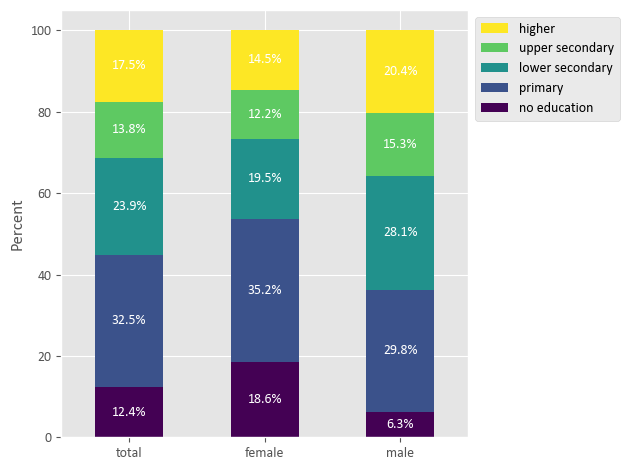

In [51]:
fig = pct_edu.plot.bar(stacked=True, colormap='viridis')

for bar in fig.containers:
    fig.bar_label(bar, label_type='center', color='white', fmt='%.1f%%')
    
fig.legend(bbox_to_anchor=(1, 1), loc=2, reverse=True)
fig.set_ylabel('Percent')
#fig.set_title('Highest education attended')

plt.xticks(rotation=0)

plt.tight_layout()
#plt.savefig('fig10_education_attended.png')

### 6. Women's Literacy

#### Datensatzerstellung

In [52]:
mics_w = pd.merge(mics_hh, mics_wm, on=['hh1', 'hh2'])

In [53]:
mics_w = mics_w[mics_w['wm17'] =="COMPLETED"]

In [54]:
mics_w['wm17'].value_counts()

wm17
COMPLETED                                    30660
INCAPACITATED                                    0
NO ADULT CONSENT FOR RESPONDENT AGE 15-17        0
NOT AT HOME                                      0
OTHER                                            0
PARTLY COMPLETED                                 0
REFUSED                                          0
Name: count, dtype: int64

In [55]:
# keep individuals with completed interview
mics_w = mics_w.drop(mics_w[mics_w['wm17'] != 'COMPLETED'].index)

#### Variablenaufbereitung

In [56]:
mics_w['wb14'].value_counts()

wb14
CANNOT READ AT ALL                            6355
ABLE TO READ WHOLE SENTENCE                   6188
ABLE TO READ ONLY PARTS OF SENTENCE           3628
NO SENTENCE IN REQUIRED LANGUAGE / BRAILLE      11
NO RESPONSE                                      7
Name: count, dtype: int64

In [57]:
mics_w['wb6a'].value_counts()

wb6a
PRIMARY                                 11647
INTERMEDIATE/LOWER SECONDARY             5707
SECONDARY/ UPPER SECONDARY               4008
BACHELORS DEGREE                         3206
DIPLOMA                                  1022
DIPLOMA (5 YEARS AFTER INTERMEDIATE)      407
HIGHER EDUCATION                          121
ECE                                         6
Name: count, dtype: int64

In [58]:
# Variable aufbereiten
mics_w.loc[mics_w['wb14']=='CANNOT READ AT ALL', 'literacy'] = 0
mics_w.loc[mics_w['wb14']=='ABLE TO READ ONLY PARTS OF SENTENCE', 'literacy'] = 1
mics_w.loc[mics_w['wb14']=='ABLE TO READ WHOLE SENTENCE', 'literacy'] = 2

mics_w.loc[mics_w['wb6a']=='INTERMEDIATE/LOWER SECONDARY', 'literacy'] = 2
mics_w.loc[mics_w['wb6a']=='SECONDARY/ UPPER SECONDARY', 'literacy'] = 2
mics_w.loc[mics_w['wb6a']=='BACHELORS DEGREE', 'literacy'] = 2
mics_w.loc[mics_w['wb6a']=='DIPLOMA', 'literacy'] = 2
mics_w.loc[mics_w['wb6a']=='DIPLOMA (5 YEARS AFTER INTERMEDIATE)', 'literacy'] = 2
mics_w.loc[mics_w['wb6a']=='HIGHER EDUCATION', 'literacy'] = 2

#mics_w.loc[(mics_w['literacy']!=0) & (mics_w['literacy']!=1) & (mics_w['literacy']!=2), 'literacy'] = np.nan

mics_w['literacy'].value_counts()

literacy
2.0    20659
0.0     6355
1.0     3628
Name: count, dtype: int64

In [59]:
# map values to variable

literacy = {0:'cannot read at all', 1:'able to read parts of sentence', 2:'able to read whole sentence'}

mics_w['literacy'] = mics_w['literacy'].map(literacy)
mics_w['literacy'].value_counts()

literacy
able to read whole sentence       20659
cannot read at all                 6355
able to read parts of sentence     3628
Name: count, dtype: int64

In [60]:
# birth year
mics_w['byear'] = pd.to_numeric(mics_w['wb3y'], errors='coerce')
mics_w['byear'] = mics_w['byear'].fillna(0)
mics_w = mics_w.drop(mics_w[mics_w['byear'] == 0].index)
mics_w['byear'].value_counts(normalize=True)

byear
2000.0    0.043284
2002.0    0.043121
2001.0    0.042795
1999.0    0.040935
1997.0    0.039141
1998.0    0.038881
1994.0    0.035847
1996.0    0.035651
1990.0    0.035032
1995.0    0.034184
1993.0    0.033825
1992.0    0.030628
1989.0    0.029845
1985.0    0.029356
1991.0    0.028736
1984.0    0.026877
1988.0    0.026845
1987.0    0.026421
1983.0    0.026388
1980.0    0.026388
1986.0    0.025703
1982.0    0.025279
1981.0    0.024039
1979.0    0.023844
1978.0    0.022702
1972.0    0.022572
1974.0    0.021919
1977.0    0.021821
1975.0    0.021039
1976.0    0.020778
1973.0    0.020647
1971.0    0.018364
1970.0    0.018233
1969.0    0.015722
2003.0    0.014548
1968.0    0.008611
Name: proportion, dtype: float64

In [61]:
# region
mics_w['region'] = mics_w['hh7_x'].str.title()
mics_w['region'].value_counts()

region
Baghdad        3261
Anbar          1817
Thiqar         1802
Muthana        1799
Qadisyah       1754
Basrah         1727
Salahaddin     1720
Duhok          1689
Nainawa        1684
Najaf          1663
Diala          1637
Misan          1617
Wasit          1581
Babil          1554
Karbalah       1543
Kirkuk         1359
Erbil          1235
Sulaimaniya    1216
Name: count, dtype: int64

#### Graphikerstellung

In [62]:
# relative frequencies (female)

mics_w['gender']='female'

pct_lit_female = pd.crosstab(index=mics_w['gender'], columns=mics_w['literacy'], 
                            values=mics_w['hhweight'], aggfunc=sum, normalize='index')*100

pct_lit_female

literacy,able to read parts of sentence,able to read whole sentence,cannot read at all
gender,,,
female,11.200482,69.040778,19.75874


In [63]:
# relative frequencies by birthyear

mics_w['byear'] = mics_w['byear'].astype(int)

pct_lit_byear = pd.crosstab(index=mics_w['byear'], columns=mics_w['literacy'], 
                            values=mics_w['hhweight'], aggfunc=sum, normalize='index')*100

pct_lit_byear = pct_lit_byear.reindex(['cannot read at all','able to read parts of sentence','able to read whole sentence'], 
     axis='columns')

pct_lit_byear

literacy,cannot read at all,able to read parts of sentence,able to read whole sentence
byear,,,
1968,33.818352,12.961476,53.220172
1969,22.621680,13.720243,63.658078
1970,19.723339,15.126397,65.150264
1971,19.329670,14.682564,65.987767
1972,22.150455,14.882265,62.967280
1973,28.464088,11.621047,59.914865
1974,27.434545,13.807340,58.758115
1975,25.685512,14.019324,60.295164
1976,23.175719,16.356352,60.467929


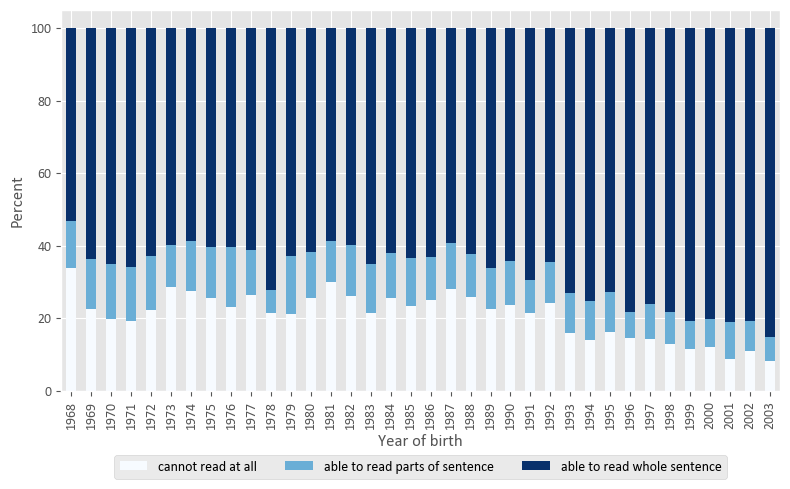

In [141]:
pct_lit_byear.plot(kind='bar', stacked=True, colormap='Blues', figsize=(8,5))

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='center', ncol=5)
plt.xlabel('Year of birth')
plt.ylabel('Percent')

plt.tight_layout()
plt.savefig('fig13_literacy_byear.png')

In [92]:
# relative frequencies by governorate
pct_lit_regio = pd.crosstab(index=mics_w['region'], columns=mics_w['literacy'], 
                            values=mics_w['hhweight'], aggfunc=sum, normalize='index')*100

pct_lit_regio.reset_index(inplace=True)

pct_lit_regio

literacy,region,able to read parts of sentence,able to read whole sentence,cannot read at all
0,Anbar,15.215500,65.930901,18.853599
1,Babil,17.430474,65.804069,16.765457
2,Baghdad,10.107966,76.971336,12.920699
3,Basrah,9.438868,71.095571,19.465561
4,Diala,14.397471,73.240423,12.362106
5,Duhok,7.427689,66.849306,25.723005
6,Erbil,6.643545,68.443304,24.913151
7,Karbalah,8.071509,74.076758,17.851733
8,Kirkuk,18.189153,68.567386,13.243461
9,Misan,14.558333,55.107503,30.334163


In [93]:
pcode = ['IQG01', 'IQG07', 'IQG08', 'IQG02', 'IQG10', 'IQG09', 'IQG11', 'IQG12', 'IQG13', 
                       'IQG14', 'IQG03', 'IQG15', 'IQG04', 'IQG05', 'IQG16', 'IQG06', 'IQG17', 'IQG18']

pct_lit_regio['pcode'] = pcode

pct_lit_regio

literacy,region,able to read parts of sentence,able to read whole sentence,cannot read at all,pcode
0,Anbar,15.215500,65.930901,18.853599,IQG01
1,Babil,17.430474,65.804069,16.765457,IQG07
2,Baghdad,10.107966,76.971336,12.920699,IQG08
3,Basrah,9.438868,71.095571,19.465561,IQG02
4,Diala,14.397471,73.240423,12.362106,IQG10
5,Duhok,7.427689,66.849306,25.723005,IQG09
6,Erbil,6.643545,68.443304,24.913151,IQG11
7,Karbalah,8.071509,74.076758,17.851733,IQG12
8,Kirkuk,18.189153,68.567386,13.243461,IQG13
9,Misan,14.558333,55.107503,30.334163,IQG14


In [94]:
# shapefile
map_df = gpd.read_file('data/irq_admbnda_adm1_cso_20190603.shx')

In [95]:
df_regio = map_df.merge(pct_lit_regio, left_on=['ADM1_PCODE'], right_on=['pcode'])
df_regio.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,...,ADM0_PCODE,date,validOn,validTo,geometry,region,able to read parts of sentence,able to read whole sentence,cannot read at all,pcode
0,17.090203,11.953673,Al-Anbar,الانبار,IQG01,None,None,None,None,None,...,IQ,2019-05-30,2019-06-03,None,"POLYGON ((41.27872 35.14914, 41.30727 35.14842...",Anbar,15.215500,65.930901,18.853599,IQG01
1,8.057029,1.774143,Al-Basrah,البصرة,IQG02,None,None,None,None,None,...,IQ,2019-05-30,2019-06-03,None,"POLYGON ((47.66124 31.26825, 47.66724 31.26725...",Basrah,9.438868,71.095571,19.465561,IQG02
2,10.084730,4.838574,Al-Muthanna,المثنى,IQG03,None,None,None,None,None,...,IQ,2019-05-30,2019-06-03,None,"POLYGON ((45.24242 31.74129, 45.24884 31.74048...",Muthana,15.546527,55.205445,29.248028,IQG03
3,8.959419,3.797184,Al-Najaf,النجف,IQG04,None,None,None,None,None,...,IQ,2019-05-30,2019-06-03,None,"POLYGON ((44.34425 32.31681, 44.34995 32.30601...",Najaf,9.951255,65.438789,24.609956,IQG04
4,4.772678,0.808105,Al-Qadissiya,القادسية,IQG05,None,None,None,None,None,...,IQ,2019-05-30,2019-06-03,None,"POLYGON ((45.26993 32.35793, 45.27767 32.35674...",Qadisyah,10.951672,68.868372,20.179957,IQG05


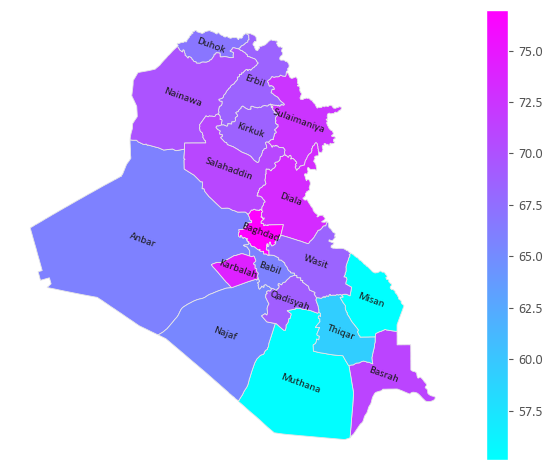

In [96]:
fig = df_regio.plot(column='able to read whole sentence', cmap='cool', linewidth=.6, edgecolor='0.9', legend=True)
df_regio.apply(lambda x: fig.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                      ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)

fig.axis('off')

plt.tight_layout()
plt.savefig('fig14_literacy_regional.png')

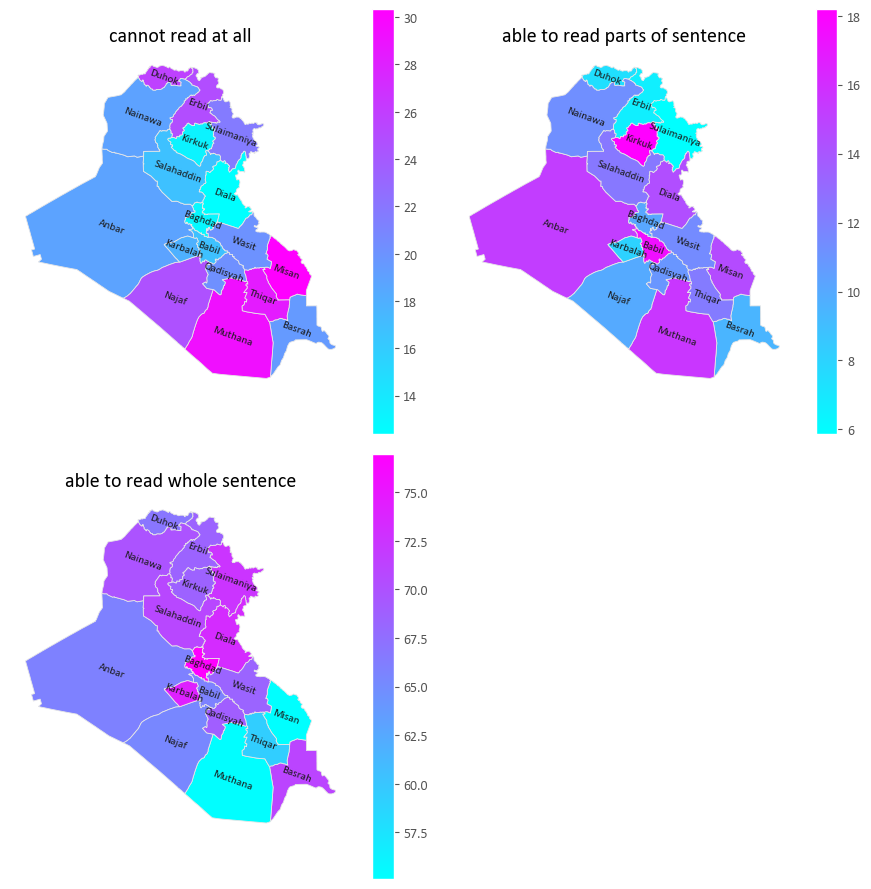

In [97]:
#Gesamtgraphik
fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(2, 2, 1)
df_regio.plot(column='cannot read at all', cmap='cool', linewidth=.6, ax=ax1, edgecolor='0.9', legend=True)
df_regio.apply(lambda x: ax1.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax1.set_title('cannot read at all')
ax1.axis('off')

ax2 = fig.add_subplot(2, 2, 2)
df_regio.plot(column='able to read parts of sentence', cmap='cool', linewidth=.6, ax=ax2, edgecolor='0.9', legend=True)
df_regio.apply(lambda x: ax2.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax2.set_title('able to read parts of sentence')
ax2.axis('off')

ax3 = fig.add_subplot(2, 2, 3)
df_regio.plot(column='able to read whole sentence', cmap='cool', linewidth=.6, ax=ax3, edgecolor='0.9', legend=True)
df_regio.apply(lambda x: ax3.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax3.set_title('able to read whole sentence')
ax3.axis('off')

plt.tight_layout()
plt.savefig('x_literacy_regional.png')

## 7. Adolescents' enrollment 2011 vs. 2018

#### Datensatz

In [99]:
mics_2011_hh = pd.read_spss('data/Iraq_MICS4_Datasets/hh.sav').rename(str.lower, axis='columns')
mics_2011_hl = pd.read_spss('data/Iraq_MICS4_Datasets/hl.sav').rename(str.lower, axis='columns')

In [100]:
mics_2011 = pd.merge(mics_2011_hh, mics_2011_hl, on=['hh1', 'hh2'])

In [101]:
mics_2011['hh9'].value_counts()

hh9
Completed                                             238327
Dwelling destroyed                                         0
Dwelling not found                                         0
Dwelling vecant or adrress not a dwelling                  0
Entire HH absent for extended period of time               0
Not HH member /respondent at home at time of visit         0
Other                                                      0
Refused                                                    0
Name: count, dtype: int64

In [102]:
# keep individuals with completed interview
mics_2011 = mics_2011.drop(mics_2011[mics_2011['hh9'] != 'Completed'].index)

In [103]:
mics_2011.head()

,hh1,hh2,hh3,hh4,hh5d_x,hh5m_x,hh5y_x,hh6_x,hh71_x,hh72r_x,...,region_y,melevel,felevel,helevel_y,schage,wscore_y,windex5_y,hhweight_y,psu_y,stratum_y
0,1.0,1.0,1.0,2.0,28.0,2.0,2011.0,Urban,Dohuk,DUHOK,...,Kurdistan Region,NaN,NaN,Secondary +,36.0,0.296666,Middle,1.149395,1.0,1.0
1,1.0,1.0,1.0,2.0,28.0,2.0,2011.0,Urban,Dohuk,DUHOK,...,Kurdistan Region,NaN,NaN,Secondary +,37.0,0.296666,Middle,1.149395,1.0,1.0
2,1.0,1.0,1.0,2.0,28.0,2.0,2011.0,Urban,Dohuk,DUHOK,...,Kurdistan Region,NaN,NaN,Secondary +,35.0,0.296666,Middle,1.149395,1.0,1.0
3,1.0,2.0,1.0,2.0,28.0,2.0,2011.0,Urban,Dohuk,DUHOK,...,Kurdistan Region,NaN,NaN,None,48.0,0.840771,Fourth,1.149395,1.0,1.0
4,1.0,2.0,1.0,2.0,28.0,2.0,2011.0,Urban,Dohuk,DUHOK,...,Kurdistan Region,NaN,NaN,None,42.0,0.840771,Fourth,1.149395,1.0,1.0


In [104]:
mics_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238327 entries, 0 to 238326
Columns: 180 entries, hh1 to stratum_y
dtypes: category(148), float64(32)
memory usage: 91.9 MB


#### Datenaufbereitung

In [105]:
# birth year
mics_2011['byear'] = pd.to_numeric(mics_2011['hl5y'], errors='coerce') 
mics_2011['byear'].value_counts(normalize=True)

byear
2010.0    0.033067
2009.0    0.031259
2008.0    0.031049
2005.0    0.030520
2007.0    0.029911
            ...   
1908.0    0.000004
1900.0    0.000004
1905.0    0.000004
1903.0    0.000004
1906.0    0.000004
Name: proportion, Length: 110, dtype: float64

In [106]:
# age
mics_2011.rename(columns={'hl6': 'age'}, inplace=True)

In [107]:
# gender
mics_2011['gender'] = mics_2011['hl4'].str.lower()
mics_2011['gender'].value_counts()

gender
male      119963
female    118364
Name: count, dtype: int64

In [108]:
mics_2011.loc[mics_2011['hh71_x']=='Suleimaniya', 'region'] = 'Sulaimaniya'
mics_2011.loc[mics_2011['hh71_x']=='Al-Anbar', 'region'] = 'Anbar'
mics_2011.loc[mics_2011['hh71_x']=='Ninewa', 'region'] = 'Nainawa'
mics_2011.loc[mics_2011['hh71_x']=='Al-Najaf', 'region'] = 'Najaf'
mics_2011.loc[mics_2011['hh71_x']=='Dohuk', 'region'] = 'Duhok'
mics_2011.loc[mics_2011['hh71_x']=='Missan', 'region'] = 'Misan'
mics_2011.loc[mics_2011['hh71_x']=='Thi-Qar', 'region'] = 'Thiqar'
mics_2011.loc[mics_2011['hh71_x']=='Diyala', 'region'] = 'Diala'
mics_2011.loc[mics_2011['hh71_x']=='Al-Muthanna', 'region'] = 'Muthana'
mics_2011.loc[mics_2011['hh71_x']=='Al-Qadisiya', 'region'] = 'Qadisyah'
mics_2011.loc[mics_2011['hh71_x']=='Karbala', 'region'] = 'Karbala'
mics_2011.loc[mics_2011['hh71_x']=='Baghdad', 'region'] = 'Baghdad'
mics_2011.loc[mics_2011['hh71_x']=='Salahaddin', 'region'] = 'Salahaddin'
mics_2011.loc[mics_2011['hh71_x']=='Erbil', 'region'] = 'Erbil'
mics_2011.loc[mics_2011['hh71_x']=='Wasit', 'region'] = 'Wasit'
mics_2011.loc[mics_2011['hh71_x']=='Babil', 'region'] = 'Babil'
mics_2011.loc[mics_2011['hh71_x']=='Kirkuk', 'region'] = 'Kirkuk'
mics_2011.loc[mics_2011['hh71_x']=='Basrah', 'region'] = 'Basrah'

mics_2011['region'].value_counts()

region
Sulaimaniya    23827
Baghdad        18059
Anbar          17700
Salahaddin     17448
Erbil          15998
Basrah         15762
Nainawa        15565
Duhok          15330
Misan          14018
Wasit          12958
Thiqar         12121
Diala          11440
Muthana        10209
Qadisyah        9363
Babil           8695
Kirkuk          7713
Najaf           6231
Karbala         5890
Name: count, dtype: int64

In [109]:
# area (urban/rural)
mics_2011['area'] = mics_2011['hh6_x'].str.lower()
mics_2011['area'].value_counts()

area
urban    135892
rural    102435
Name: count, dtype: int64

In [110]:
# ever attended school
mics_2011['ed3'].replace(['DK', 'NO RESPONSE'], np.NaN, inplace=True)
mics_2011['ed3'].value_counts(normalize=True)

ed3
Yes    0.777497
No     0.222503
Name: proportion, dtype: float64

In [111]:
# highest education attended (individual)
mics_2011['ed4a'].replace(['DK', 'NO RESPONSE', 'Missing'], np.NaN, inplace=True)
mics_2011['ed4a'].value_counts(normalize=True)

ed4a
Primary                   0.588794
Intermediate              0.203237
Secondary                 0.095417
Bachelor                  0.052204
Diploma                   0.045368
Non Standard              0.008061
Preschool/kindergarten    0.004789
Higher Studies            0.002130
Name: proportion, dtype: float64

In [112]:
# join information from columns ed4 and ed5a

mics_2011.loc[mics_2011['ed3']=='No', 'edulevel'] = 0
mics_2011.loc[mics_2011['ed4a']=='Preschool/kindergarten', 'edulevel'] = 0
mics_2011.loc[mics_2011['ed4a']=='Primary', 'edulevel'] = 1
mics_2011.loc[mics_2011['ed4a']=='Intermediate', 'edulevel'] = 2
mics_2011.loc[mics_2011['ed4a']=='Secondary', 'edulevel'] = 3
mics_2011.loc[mics_2011['ed4a']=='Bachelor', 'edulevel'] = 4
mics_2011.loc[mics_2011['ed4a']=='Diploma', 'edulevel'] = 4
mics_2011.loc[mics_2011['ed4a']=='Higher Studies', 'edulevel'] = 4

mics_2011['edulevel'].value_counts(normalize=True)

edulevel
1.0    0.460649
0.0    0.227693
2.0    0.159005
4.0    0.078003
3.0    0.074650
Name: proportion, dtype: float64

In [113]:
# highest education attended (parents)
mics_2011['parent_edu'] = mics_2011['edulevel'][(mics_2011['hl3']=='Head') | (mics_2011['hl3']=='Wife / Husband')]

In [114]:
mics_2011['parent_edu'] = mics_2011.groupby(['hh1', 'hh2'])['parent_edu'].transform('max')

In [115]:
mics_2011[['hh1', 'hh2', 'hl3', 'ed3', 'ed4a', 'parent_edu']].head()

,hh1,hh2,hl3,ed3,ed4a,parent_edu
0,1.0,1.0,Head,Yes,Intermediate,3.0
1,1.0,1.0,Wife / Husband,Yes,Secondary,3.0
2,1.0,1.0,Wife / Husband,Yes,Primary,3.0
3,1.0,2.0,Head,No,NaN,2.0
4,1.0,2.0,Wife / Husband,Yes,Intermediate,2.0


In [116]:
mics_2011['parent_edu'].value_counts(normalize=True)

parent_edu
1.0    0.340825
0.0    0.209069
2.0    0.200437
4.0    0.151936
3.0    0.097733
Name: proportion, dtype: float64

In [117]:
# map values to educational variables

edumap = {0:'no education', 1:'primary', 2:'lower secondary', 3:'upper secondary', 4:'higher'}

mics_2011['edulevel'] = mics_2011['edulevel'].map(edumap)
mics_2011['parent_edu'] = mics_2011['parent_edu'].map(edumap)

In [118]:
# currently attending education?
mics_2011['ed5'].replace(['DK', 'NO RESPONSE', 'Missing'], np.NaN, inplace=True)
mics_2011['ed5'].value_counts(normalize=True)

ed5
Yes    0.694845
No     0.305155
Name: proportion, dtype: float64

In [160]:
mics_2011.loc[mics_2011['ed3']=='No', 'current'] = "not enrolled" #never enrolled
mics_2011.loc[mics_2011['ed5']=='No', 'current'] = "not enrolled" #currently not enrolled
mics_2011.loc[mics_2011['ed5']=='Yes', 'current'] = "enrolled" #currently enrolled

mics_2011['current'].value_counts()

current
not enrolled    73330
enrolled        64770
Name: count, dtype: int64

In [119]:
# educational level currently attended
mics_2011['ed6a'].replace(['DK', 'NO RESPONSE'], np.NaN, inplace=True)
mics_2011['ed6a'].value_counts(normalize=True)

ed6a
Primary                   0.632571
Intermediate              0.196853
Secondary                 0.113125
Bachelor                  0.036746
Diploma                   0.011672
Preschool/kindergarten    0.008801
Higher Studies            0.000216
Non Standard              0.000015
Name: proportion, dtype: float64

In [161]:
#Secondary school attendance of 14- to 16-year-olds

mics_2011.loc[mics_2011['ed3']=='No', 'secondary_participation'] = 0
mics_2011.loc[mics_2011['ed5']=='No', 'secondary_participation'] = 0
mics_2011.loc[(mics_2011['ed5']=='Yes') & (mics_2011['ed6a']!='Primary') & (mics_2011['ed6a']!='Intermediate') | (mics_2011['ed6a']!='Secondary'), 'secondary_participation'] = 0
mics_2011.loc[(mics_2011['ed6a']=='Primary') | (mics_2011['ed6a']=='Intermediate') | (mics_2011['ed6a']=='Secondary'), 'secondary_participation'] = 1
mics_2011.loc[(mics_2011['age']!=14) & (mics_2011['age']!=15) & (mics_2011['age']!=16), 'secondary_participation'] = np.nan

mics_2011['secondary_participation'].value_counts(normalize=True)

secondary_participation
1.0    0.59907
0.0    0.40093
Name: proportion, dtype: float64

In [145]:
#grade level
mics_2011["ed4a"].value_counts()

ed4a
Primary                   92327
Intermediate              31869
Secondary                 14962
Bachelor                   8186
Diploma                    7114
Non Standard               1264
Preschool/kindergarten      751
Higher Studies              334
Name: count, dtype: int64

In [148]:
mics_2011["ed4b"].replace(['DK', 'Missing'], np.NaN, inplace=True)
mics_2011["ed4b"].value_counts()

ed4b
2.0    28839
4.0    24892
6.0    24264
3.0    19964
5.0    19953
1.0    19480
0.0    18590
Name: count, dtype: int64

In [150]:
mics_2011['grade_level'] = pd.to_numeric(mics_2011['ed4b'])
mics_2011.loc[mics_2011['ed3']=='No', 'grade_level'] = 0
mics_2011.loc[mics_2011['ed4a']=='Preschool/kindergarten', 'grade_level'] = 0
mics_2011.loc[mics_2011['ed4a']=='Primary', 'grade_level'] += 0
mics_2011.loc[mics_2011['ed4a']=='Intermediate', 'grade_level'] += 6
mics_2011.loc[mics_2011['ed4a']=='Secondary', 'grade_level'] += 6
mics_2011.loc[mics_2011['ed4a']=='Diploma', 'grade_level'] = 12
mics_2011.loc[mics_2011['ed4a']=='Bachelor', 'grade_level'] = 12
mics_2011.loc[mics_2011['ed4a']=='Higher Studies', 'grade_level'] = 12

mics_2011.loc[mics_2011['grade_level']>11, 'grade_level'] = 11

gradelevel = {0:'never attended',1:'grade 1',2:'grade 2',3:'grade 3',4:'grade 4',5:'grade 5',6:'grade 6',7:'grade 7',
              8:'grade 8',9:'grade 9',10:'grade 10',11:'grade 11 or higher'}

mics_2011['grade_level'] = mics_2011['grade_level'].map(gradelevel)

mics_2011["grade_level"].value_counts()

grade_level
never attended        54172
grade 6               27894
grade 12 or higher    20574
grade 4               16464
grade 5               15662
grade 3               13103
grade 2               11150
grade 8               10935
grade 1                9386
grade 7                8790
grade 9                6153
grade 11               4003
grade 10               3332
Name: count, dtype: int64

In [121]:
# weights
mics_2011['hhweight_x'].describe()

count    238327.000000
mean          0.968227
std           1.131759
min           0.028001
25%           0.315980
50%           0.627118
75%           1.078191
max           5.812997
Name: hhweight_x, dtype: float64

### Data visualization

In [153]:
# dataframe for 14- to 16-year-olds

eduSec_2011 = mics_2011.loc[mics_2011['age'].isin([*range(14, 17)]), 
                ['secondary_participation', 'age', 'gender', 'area', 'parent_edu', 'region', 'grade_level', 'current', 'hhweight_x']].copy()

eduSec_2011.head()

,secondary_participation,age,gender,area,parent_edu,region,grade_level,current,hhweight_x
7,1.0,16.0,male,urban,lower secondary,Duhok,grade 8,enrolled,1.149395
34,1.0,16.0,male,urban,lower secondary,Duhok,grade 6,enrolled,1.149395
45,1.0,14.0,female,urban,no education,Duhok,grade 8,enrolled,1.149395
57,1.0,14.0,female,urban,no education,Duhok,grade 8,enrolled,1.149395
70,1.0,16.0,male,urban,no education,Duhok,grade 10,enrolled,1.149395


In [123]:
# relative frequencies of total secondary school attendance

eduSec_2011['total'] = 'total'

pct_sec_total_2011 = pd.crosstab(index=eduSec_2011['total'], columns=eduSec_2011['secondary_participation'], 
                            values=eduSec_2011['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_total_2011

secondary_participation,0.0,1.0
total,,
total,37.762636,62.237364


In [124]:
# relative frequencies of secondary school attendance by gender

pct_sec_gender_2011 = pd.crosstab(index=eduSec_2011['gender'], columns=eduSec_2011['secondary_participation'], 
                            values=eduSec_2011['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_gender_2011

secondary_participation,0.0,1.0
gender,,
female,47.432383,52.567617
male,28.566115,71.433885


In [125]:
# relative frequencies of secondary school attendance by age

pct_sec_age_2011 = pd.crosstab(index=eduSec_2011['age'], columns=eduSec_2011['secondary_participation'], 
                            values=eduSec_2011['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_age_2011 = pct_sec_age_2011[pct_sec_age_2011.index.isin([*range(14, 17)])]

pct_sec_age_2011.rename(index={14:'14 yrs', 15:'15 yrs', 16:'16 yrs'}, inplace=True)

pct_sec_age_2011

secondary_participation,0.0,1.0
age,,
14 yrs,29.428276,70.571724
15 yrs,37.081790,62.918210
16 yrs,47.208984,52.791016


In [126]:
# relative frequencies of secondary school attendance by parental education

pct_sec_hedulevel_2011 = pd.crosstab(index=eduSec_2011['parent_edu'], columns=eduSec_2011['secondary_participation'], 
                            values=eduSec_2011['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_hedulevel_2011 = pct_sec_hedulevel_2011.reindex(['no education','primary','lower secondary','upper secondary','higher'])

pct_sec_hedulevel_2011

secondary_participation,0.0,1.0
parent_edu,,
no education,51.348457,48.651543
primary,49.496125,50.503875
lower secondary,38.909656,61.090344
upper secondary,24.008347,75.991653
higher,13.802210,86.197790


In [127]:
# relative frequencies of secondary school attendance by area

pct_sec_area_2011 = pd.crosstab(index=eduSec_2011['area'], columns=eduSec_2011['secondary_participation'], 
                            values=eduSec_2011['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_area_2011

secondary_participation,0.0,1.0
area,,
rural,51.409876,48.590124
urban,31.310700,68.689300


In [128]:
# relative frequencies of secondary school attendance by region

pct_sec_region_2011 = pd.crosstab(index=eduSec_2011['region'], columns=eduSec_2011['secondary_participation'], 
                            values=eduSec_2011['hhweight_x'], aggfunc=sum, normalize='index')*100

pct_sec_region_2011.reset_index(inplace=True)

pct_sec_region_2011

secondary_participation,region,0.0,1.0
0,Anbar,40.096057,59.903943
1,Babil,40.855671,59.144329
2,Baghdad,36.701440,63.298560
3,Basrah,40.121243,59.878757
4,Diala,37.939463,62.060537
5,Duhok,25.351443,74.648557
6,Erbil,19.862694,80.137306
7,Karbala,44.329918,55.670082
8,Kirkuk,36.338093,63.661907
9,Misan,50.567620,49.432380


In [129]:
# concatenate aggregate tables

pct_sec_2011 = pd.concat([pct_sec_total_2011, pct_sec_gender_2011, pct_sec_age_2011, pct_sec_hedulevel_2011, pct_sec_area_2011])

pct_sec_2011

secondary_participation,0.0,1.0
total,37.762636,62.237364
female,47.432383,52.567617
male,28.566115,71.433885
14 yrs,29.428276,70.571724
15 yrs,37.081790,62.918210
16 yrs,47.208984,52.791016
no education,51.348457,48.651543
primary,49.496125,50.503875
lower secondary,38.909656,61.090344
upper secondary,24.008347,75.991653


### Comparison of enrollment 2011 vs. 2018

In [130]:
pct_sec_2018 = pct_sec.drop([0], axis=1).set_axis(['2018'], axis=1)

pct_sec_2018

,2018
total,69.427655
female,63.700569
male,74.786115
14 yrs,74.818606
15 yrs,69.783019
16 yrs,63.299831
no education,53.046999
primary,61.533850
lower secondary,68.072399
upper secondary,77.766924


In [131]:
pct_sec_2011 = pct_sec_2011.drop([0], axis=1).set_axis(['2011'], axis=1)

pct_sec_2011

,2011
total,62.237364
female,52.567617
male,71.433885
14 yrs,70.571724
15 yrs,62.918210
16 yrs,52.791016
no education,48.651543
primary,50.503875
lower secondary,61.090344
upper secondary,75.991653


In [132]:
pct_sec_comp = pct_sec_2011.join(pct_sec_2018)
pct_sec_comp

,2011,2018
total,62.237364,69.427655
female,52.567617,63.700569
male,71.433885,74.786115
14 yrs,70.571724,74.818606
15 yrs,62.918210,69.783019
16 yrs,52.791016,63.299831
no education,48.651543,53.046999
primary,50.503875,61.533850
lower secondary,61.090344,68.072399
upper secondary,75.991653,77.766924


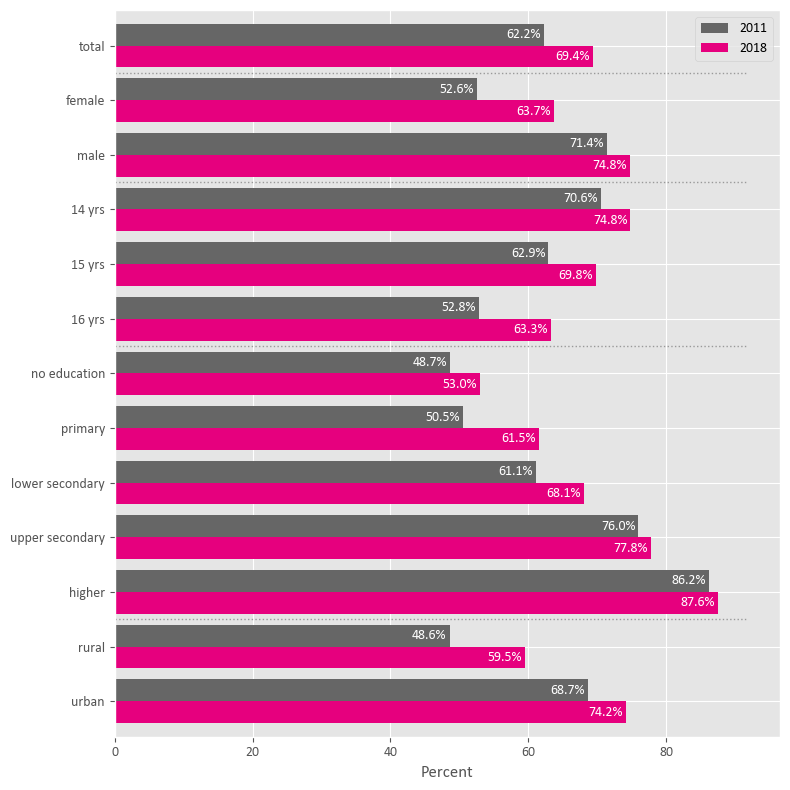

In [133]:
fig = pct_sec_comp.plot(y=["2011", "2018"], kind="barh", figsize=(8,8), width=.8, color=['0.4', '#e6007e'])

for c in fig.containers:
    fig.bar_label(c, color='white', padding=-27, fmt='%.1f%%')
    
#fig.set_title('Secondary school attendance rates of 14- to 16-year-olds')
fig.set_xlabel('Percent')
fig.legend(bbox_to_anchor=(1, 1), loc=1)

xmin,xmax = fig.get_xlim()
fig.hlines(y=[0.5, 2.5, 5.5, 10.5], lw=1, linestyles='dotted', xmin=xmin, xmax=xmax, color='0.6')

plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('x_participation_secondary_2011_2018.png')

#### Enrollment by region

In [134]:
pct_sec_region_2011['pcode'] = pcode

In [135]:
# merge dataframe with shapefile
pct_sec_merged = map_df.merge(pct_sec_region_2011, left_on=['ADM1_PCODE'], right_on=['pcode'])

In [136]:
pct_sec_merged.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,...,ADM0_AR,ADM0_PCODE,date,validOn,validTo,geometry,region,0.0,1.0,pcode
0,17.090203,11.953673,Al-Anbar,الانبار,IQG01,None,None,None,None,None,...,العراق,IQ,2019-05-30,2019-06-03,None,"POLYGON ((41.27872 35.14914, 41.30727 35.14842...",Anbar,40.096057,59.903943,IQG01
1,8.057029,1.774143,Al-Basrah,البصرة,IQG02,None,None,None,None,None,...,العراق,IQ,2019-05-30,2019-06-03,None,"POLYGON ((47.66124 31.26825, 47.66724 31.26725...",Basrah,40.121243,59.878757,IQG02
2,10.084730,4.838574,Al-Muthanna,المثنى,IQG03,None,None,None,None,None,...,العراق,IQ,2019-05-30,2019-06-03,None,"POLYGON ((45.24242 31.74129, 45.24884 31.74048...",Muthana,47.448552,52.551448,IQG03
3,8.959419,3.797184,Al-Najaf,النجف,IQG04,None,None,None,None,None,...,العراق,IQ,2019-05-30,2019-06-03,None,"POLYGON ((44.34425 32.31681, 44.34995 32.30601...",Najaf,44.787926,55.212074,IQG04
4,4.772678,0.808105,Al-Qadissiya,القادسية,IQG05,None,None,None,None,None,...,العراق,IQ,2019-05-30,2019-06-03,None,"POLYGON ((45.26993 32.35793, 45.27767 32.35674...",Qadisyah,43.978420,56.021580,IQG05


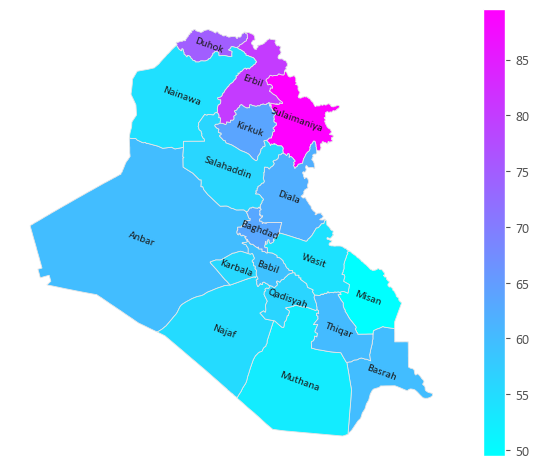

In [138]:
fig = pct_sec_merged.plot(column=1.0, cmap='cool', linewidth=.6, edgecolor='0.9', legend=True)

pct_sec_merged.apply(lambda x: fig.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
fig.axis('off')

plt.tight_layout()
plt.savefig('x_ece_regional_2011.png')

#### Grade level of adolescents

In [70]:
eduSec_2011["grade_level"].value_counts()

grade_level
grade 9               2010
grade 8               1480
grade 7               1101
grade 10               879
grade 6                868
grade 5                751
grade 11               492
never attended         398
grade 4                387
grade 3                217
grade 2                124
grade 1                 55
grade 12 or higher      28
Name: count, dtype: int64

In [154]:
eduSec_2011["current"].value_counts()

current
enrolled        10059
not enrolled     6716
Name: count, dtype: int64

In [155]:
pct_grade_level_2011 = pd.crosstab(index=eduSec_2011['grade_level'], columns=eduSec_2011['current'], 
                            values=eduSec_2011['hhweight_x'], aggfunc=sum, normalize='columns')*100

pct_grade_level_2011 = pct_grade_level_2011.reindex(['never attended','grade 1','grade 2','grade 3','grade 4','grade 5','grade 6',
                                           'grade 7','grade 8','grade 9','grade 10','grade 11 or higher'])

pct_grade_level_2011

current,enrolled,not enrolled
grade_level,,
never attended,0.074686,22.450576
grade 1,0.130251,2.621628
grade 2,0.236724,6.053371
grade 3,1.314331,10.193736
grade 4,4.636714,16.450574
grade 5,8.218713,14.306349
grade 6,28.761066,17.683387
grade 7,20.483429,5.758457
grade 8,26.788017,2.571246


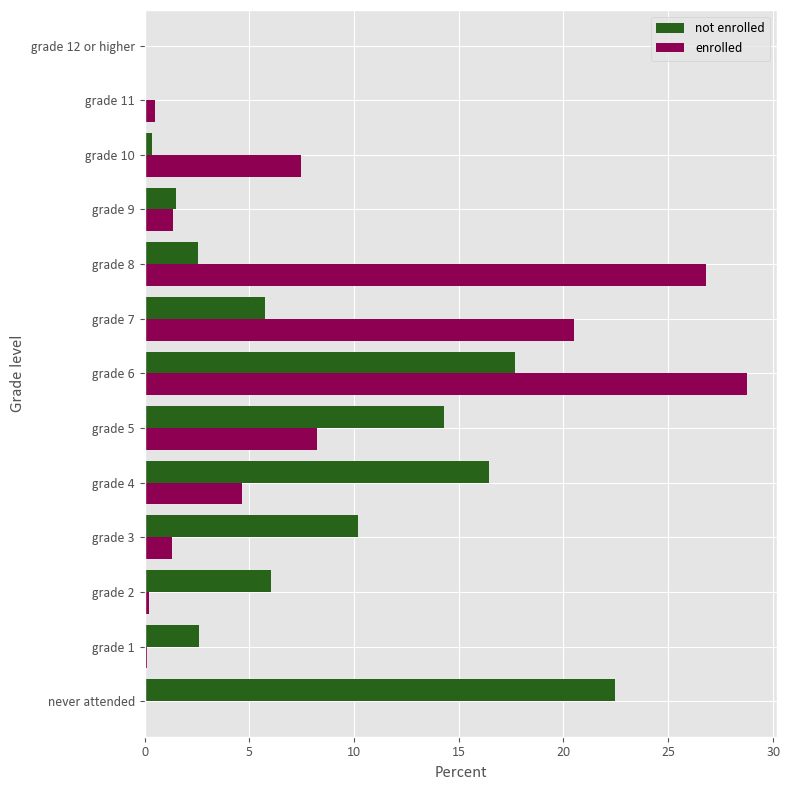

In [156]:
pct_grade_level_2011.plot(kind='barh', colormap='PiYG', figsize=(8, 8), width=.8)

plt.legend(bbox_to_anchor=(1, 1), loc=1, reverse=True)
plt.ylabel('Grade level')
plt.xlabel('Percent')
#plt.title('Highest grade level attended by adolescents')

plt.tight_layout()
#plt.savefig('x_grade_level_2011.png')